# Atividade sobre Oscilador Harmônico em 1 dimensão

### Aluna: Beatriz de Souza Pancrácio de Errico
### Matrícula: 2017019261

Nessa atividade, trabalho com um oscilador harmônico simples em uma dimensão. Obtenho o resultado numérico da equação do movimento do sistema tanto para a posição quanto para a velocidade. Também analiso qual o intervalo de tempo que me fornece o menor erro relativo para o método numérico. Por fim, analiso as energias cinética e potencial do sistema de modo a verificar se a conservação de energia realmente ocorre.

#### O que consertar
* problema ao analisar o exercicio 2 pois para mudancas no contador do for o grafico esta variando drasticamente, de modo que nao estou conseguindo tirar um resultado concreto

In [7]:
%matplotlib inline

from math import cos, sin, log10
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [8]:
# definindo as constantes necessárias para todos os exercícios
omega = 1

In [9]:
# Definindo as minhas funções

# solução analítica da minha eq diferencial que recebe o tempo, a posição inicial e a velocidade inicial e me devolve
# a posição para esses parâmetros
def x(t, x0, v0):
    return x0 * cos(omega * t) + (v0/omega) * sin(omega * t)

# função que calcula a evolução de x no tempo a partir do método de diferências finitas centrais para um determinado
# passo no tempo deltaT, um x1 no tempo atual, e um x0 no tempo anterior
def evolucaoX(deltaT, x0, x1):
    return (2 - (omega * (deltaT**2))) * x1 - x0

# função que calcula a primeira derivada em um ponto x1 a partir de um ponto anterior x0, um ponto seguinte x2, e 
#de um intervalo de tempo deltaT
def derivada1(x0, x2, deltaT):
    return (x2 - x0) / (2 * deltaT) 

# funcao que me retorna o erro relativo, sendo f1 a funcao calculada e f2 a exata
def error(f1, f2):
    return abs((f1 - f2) / (f2))

# funcao que me devolve a energia cinetica para uma dada massa e uma dada velocidade
def energiaCinetica(m, v):
    return 0.5 * (m * v**2)

# funcao que me devolve a energia potencial para uma dada constante de mola e uma dada posicao x
def energiaPotencial(k, x):
    return 0.5 * (k * x**2)

#### Questão 1
Utilize o método de diferências finitas centrais para resolver a equação do oscilador harmônico.  Utilize as condições iniciais para os casos 1 e 2 acima. Grafique $x$ vs $t$ e 
$v$ vs $t$.  Discuta seus resultados.

Text(0.5,0,'Tempo (s)')

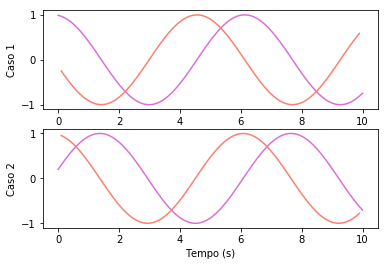

In [10]:
# Exercício 1

CondInit1 = [1, 0]                 # minhas duas possibilidades de condicoes iniciais sendo [x0, v0]
CondInit2 = [0, 1]
listTime = np.linspace(0, 10, 100) # meus passos no tempo
listX1 = []                        # lista das posições para diferentes tempos
listV1 = []                       # lista das velocidades para diferentes tempos
listX2 = []
listV2 = []

deltaT = listTime[1] - listTime[0] 

# para a primeira condição inicial
x0 = CondInit1[0]
x1 = CondInit1[1] * deltaT + x0

for t in listTime:                   # para as posicoes
    x2 = evolucaoX(deltaT, x0, x1)
    listX1.append(x2)
    x0 = x1
    x1 = x2

for i in range(len(listX1)-2):      # para as velocidades
    x0 = listX1[i]
    x2 = listX1[i + 2]
    listV1.append(derivada1(x0, x2, deltaT))
    

# para a segunda condição inicial
x0 = CondInit2[0]
x1 = CondInit2[1] * deltaT + x0

for t in listTime:                 # para as posiçoes
    x2 = evolucaoX(deltaT, x0, x1)   
    listX2.append(x2)
    x0 = x1
    x1 = x2

for i in range(len(listX2)-2):     # para as velocidades
    x0 = listX2[i]
    x2 = listX2[i + 2]
    listV2.append(derivada1(x0, x2, deltaT))
    

plt.subplot(2, 1, 1)
plt.plot(listTime, listX1, color='orchid')
plt.plot(listTime[1:99], listV1, color='salmon')
plt.ylabel('Caso 1')
plt.xlabel('Tempo (s)')

plt.subplot(2, 1, 2)
plt.plot(listTime, listX2, color='orchid')
plt.plot(listTime[1:99], listV2, color='salmon')
plt.ylabel('Caso 2')
plt.xlabel('Tempo (s)')



#### Discussão dos resultados
Como esperado fisicamente, nos pontos onde a amplitude do movimento é máxima a velocidade é nula, e nos pontos onde a amplitude é nula, a velocidade é máxima, de modo que a solução encontrada realmente representa um sistema massa-mola.

#### Questão 2
Para o `caso 1` compare o resultado numérico com o resultado analítico calculando o erro específico, dessa forma encontrando o valor de $dt$ que representa a melhor precisão. Discuta os resultados

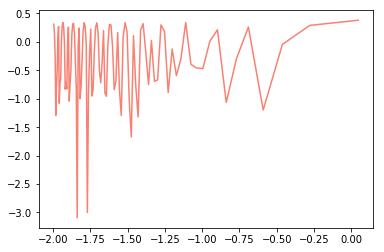

In [11]:
# Exercício 2

# definindo minhas listas necessárias para calculas os erros
listDeltaT = []
listErroRelativo = []
listX = []

for n in range (10, 1000, 10):
    listTime = np.linspace(0, 10, n)    #crio meu vetor de tempo com n termos
    deltaT = listTime[1] - listTime[0]  #calculando meu deltaT

    x0 = CondInit1[0]
    x1 = CondInit1[1] * deltaT + x0
    
    for t in listTime:                   # para as posicoes para cada lista de tempo nova
        x2 = evolucaoX(deltaT, x0, x1)
        listX.append(x2)
        x0 = x1
        x1 = x2
    
    lastX = listX[n-1]
    lastXanalitico = x(listTime[n-1], CondInit1[0], CondInit1[1])
    
    e = error(lastX, lastXanalitico)
    
    listDeltaT.append(log10(deltaT))         
    listErroRelativo.append(log10(e))

plt.plot(listDeltaT, listErroRelativo, color='Salmon')

#### Discussão dos resultados
?

#### Questão 3
Calcule a energia cinética, $E_k = m v^2/2$, a energia potencial, $U = kx^2/2$, e a energia total, $E = E_k + U$.  Discuta os resultados.

In [12]:
# Exercício 3

# constantes necessárias
m = k = 10     # precisam ser iguais para o omega ser 1

# e as listas necessárias 
listTime = np.linspace(0, 10, 100)
listEnergiaCinetica1 = []
listEnergiaPotencial1 = []
listEnergiaMecanica1 = []

listEnergiaCinetica2 = []
listEnergiaPotencial2 = []
listEnergiaMecanica2 = []

# para os caso 1 e 2
for i in range (100):
    listEnergiaCinetica1.append(energiaCinetica(m, listV1[i]))
    listEnergiaPotencial1.append(energiaPotencial(k, listX1[i]))
    listEnergiaMecanica1.append(energiaCinetica(m, listV1[i]) + energiaPotencial(k, listX1[i]))
    
    listEnergiaCinetica2.append(energiaCinetica(m, listV2[i]))
    listEnergiaPotencial2.append(energiaPotencial(k, listX2[i]))
    listEnergiaMecanica2.append(energiaCinetica(m, listV2[i]) + energiaPotencial(k, listX2[i]))
    

plt.subplot(2, 1, 1)
plt.plot(listTime, listEnergiaCinetica1, color='orchid')
plt.plot(listTime, listEnergiaPotencial1, color='salmon')
plt.plot(listTime, listEnergiaMecanica1, color='red')
plt.ylabel('Caso 1')
plt.xlabel('Tempo (s)')

plt.subplot(2, 1, 2)
plt.plot(listTime, listEnergiaCinetica2, color='orchid')
plt.plot(listTime, listEnergiaPotencial2, color='salmon')
plt.plot(listTime, listEnergiaMecanica2, color='red')
plt.ylabel('Caso 2')
plt.xlabel('Tempo (s)')

IndexError: list index out of range

#### Discussão dos resultados
Como se trata de um oscilador harmônico não amortecido, é esperado que sua energia mecânica se conserve durante todo o processo. Isso implica que quando a energia cinética é máxima a energia potencial é mínima, e vice-versa. Como observado no gráfico acima, esse foi realmente o comportamento das soluções encontradas, com uma energia mecânica de aproximadamente 5J que foi conservada.